In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


## Load Train and Test Data

In [2]:
train_input = pd.read_csv("../input/train.csv")
print(train_input.shape)

train_X = train_input.iloc[:, :-1]
train_X.head()

(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


In [3]:
train_Y = train_input.iloc[:, -1]
train_Y.head()

0    12314651
1    95149435
2    13092000
3    16000000
4     3923970
Name: revenue, dtype: int64

In [4]:
test_input = pd.read_csv("../input/test.csv")
test = pd.read_csv("../input/test.csv")
print(test.shape)
test.head()

(4398, 22)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


## Data Preprocessing

### Drop Columns

In [5]:
train_X = train_X.drop(columns=["id", "imdb_id", "poster_path", "status", "original_title", "overview", "tagline", "title", "spoken_languages"])
test = test.drop(columns=["id", "imdb_id", "poster_path", "status", "original_title", "overview", "tagline", "title", "spoken_languages"])

train_X.head()

,belongs_to_collection,budget,genres,homepage,original_language,popularity,production_companies,production_countries,release_date,runtime,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de..."
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de..."
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de..."


### Categorical to Numeric Tranformation
#### original_language

ratio of ocurrences of "en" to all data: 0.858333


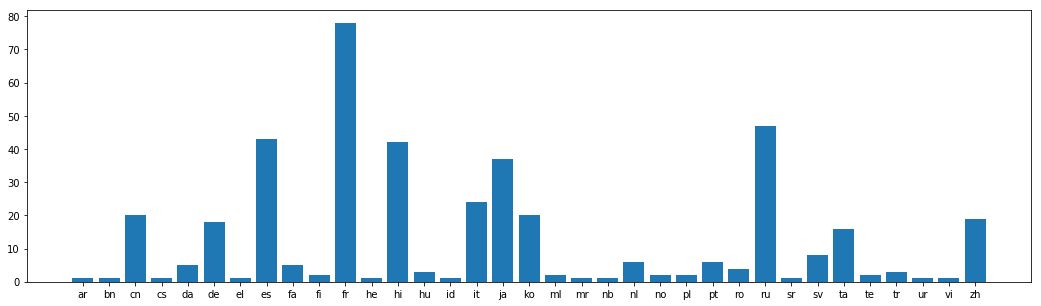

Languages that make up at least 1.0% of the data ['en', 'es', 'fr', 'hi', 'ja', 'ru']
Data % represented: 0.9406666666666667
   language_en  language_es  language_fr  language_hi  language_ja  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   language_ru  
0            0  
1            0  
2            0  
3            0  
4            0  
ratio of ocurrences of "en" to all data: 0.858572


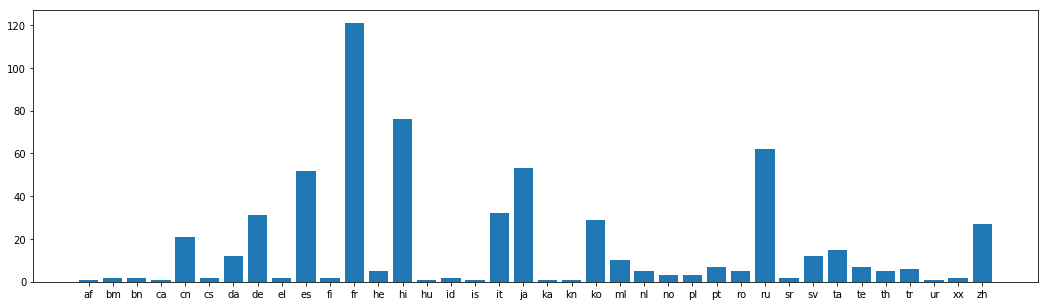

Languages that make up at least 1.0% of the data ['en', 'es', 'fr', 'hi', 'ja', 'ru']
Data % represented: 0.9413369713506139
   language_en  language_es  language_fr  language_hi  language_ja  \
0            0            0            0            0            1   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            0            0            1            0            0   
4            1            0            0            0            0   

   language_ru  
0            0  
1            0  
2            0  
3            0  
4            0  


In [6]:
def transformLanguageColumn(data):
    print("ratio of ocurrences of \"en\" to all data: %f" % (len([i for i in data["original_language"] if i == "en"])/len(data["original_language"])))

    unique, counts = np.unique([i for i in data["original_language"]], return_counts=True)
    language_counts = dict(zip(unique, counts))

    plt.figure(figsize=(18, 5))
    plt.bar(*np.unique([i for i in data["original_language"] if i != "en"], return_counts=True))
    plt.show()

    percentage_required = 0.01

    languages = [i for i in language_counts.keys() if language_counts[i]/len(data["original_language"]) > percentage_required]

    print("Languages that make up at least " + str(percentage_required * 100) + "% of the data " + str(languages))
    print("Data % represented: " + str(len([i for i in data["original_language"] if i in languages])/len(data["original_language"])))

    one_hot_lang = pd.get_dummies(pd.Categorical(data["original_language"]), prefix="language")[["language_" + i for i in languages]]
    print(one_hot_lang.head())

    data = pd.concat([data.drop(columns="original_language"), one_hot_lang], axis=1)
    
    return data

train_X = transformLanguageColumn(train_X)
test = transformLanguageColumn(test)

#### belongs_to_collection

In [7]:
import ast

def transformBelongsToCollection(data):
    btc = data["belongs_to_collection"].apply(lambda x: [i["id"] for i in ast.literal_eval(x)] if type(x) == str else [])
    print(len(np.unique(btc)))

    # high cardinality, will try using if it belongs to a collection or not as a feature instead

    btc = data["belongs_to_collection"].apply(lambda x: 1 if type(x) == str else 0)
    btc.head()

    data["belongs_to_collection"] = btc
    return data

train_X = transformBelongsToCollection(train_X)
test = transformBelongsToCollection(test)

423
557


### homepage

In [8]:
def transformHomepage(data):
    hp = data["homepage"].apply(lambda x: 1 if type(x) == str else 0)
    hp.head()

    data["homepage"] = hp
    return data

train_X = transformHomepage(train_X)
test = transformHomepage(test)

In [9]:
from typing import List, Set, Dict, Tuple
from collections import defaultdict
import operator

def get_list_of_dicts_col(data, col_name: str, dict_key: str= None) -> List[List]:
    if dict_key is None:
        return [ast.literal_eval(i) if type(i) == str else [] for i in data[col_name]]
    else:
        return [[x[dict_key] for x in ast.literal_eval(i)] if type(i) == str else [] for i in data[col_name]]

def get_sorted_unique_value_count_in_list_of_lists(list_of_lists: str or List[List], col_name: str = None, dict_key: str= None) -> List[Tuple]:
    item_count = defaultdict(int)
    
    if type(list_of_lists) == str:
        assert col_name is not None and dict_key is not None, "specify the column name dict key for which to count unique values"
        list_of_lists = get_list_of_dicts_col(col_name, dict_key)

    for list_ in list_of_lists:
        for item in list_:
            item_count[item] += 1

    return sorted(item_count.items(), key=operator.itemgetter(1), reverse=True)

def unzip_tuples(list_of_tuples: List[Tuple]) -> List[List]:
    return [list(i) for i in list(list(zip(*list_of_tuples)))]

def get_items_with_minimum_percentage(percentage: float, list_of_tuples: List[Tuple], col_name: str) -> List[Tuple]:
    return [i for i in list_of_tuples if i[1]/len(train_input[col_name]) > percentage]

def get_one_hot_df(columns: List, list_of_item_lists: List[List], column_name_prepend: str) -> pd.DataFrame:
    rows = []

    for item_list in list_of_item_lists:
        row = []
        for item in columns:
            if item in item_list:
                row.append(1)
            else:
                row.append(0)
        
        rows.append(row)    
    return pd.DataFrame(rows, columns=[column_name_prepend + str(i) for i in columns])

#### genres

In [10]:
def transformGenre(data, genre_list=None):
    genre_col = get_list_of_dicts_col(data, "genres", "id")

    if genre_list is None:
        genre_count_tuples = get_sorted_unique_value_count_in_list_of_lists(genre_col)
        genre_list = unzip_tuples(genre_count_tuples)[0]
        print("Number of unique genres: %d" % len(genre_count_tuples))
        print(genre_list)
    else:
        print("Making one hot columns using list:\n" + str(genre_list))

    one_hot_genre = get_one_hot_df(genre_list, genre_col, "genre_")
    return pd.concat([data.drop(columns="genres"), one_hot_genre], axis=1), genre_list

train_X, genre_list = transformGenre(train_X)
test, _ = transformGenre(test, genre_list)

Number of unique genres: 20
[18, 35, 53, 28, 10749, 80, 12, 27, 878, 10751, 14, 9648, 16, 36, 10402, 10752, 99, 37, 10769, 10770]
Making one hot columns using list:
[18, 35, 53, 28, 10749, 80, 12, 27, 878, 10751, 14, 9648, 16, 36, 10402, 10752, 99, 37, 10769, 10770]


#### production_countries

Number of unique countries: 74


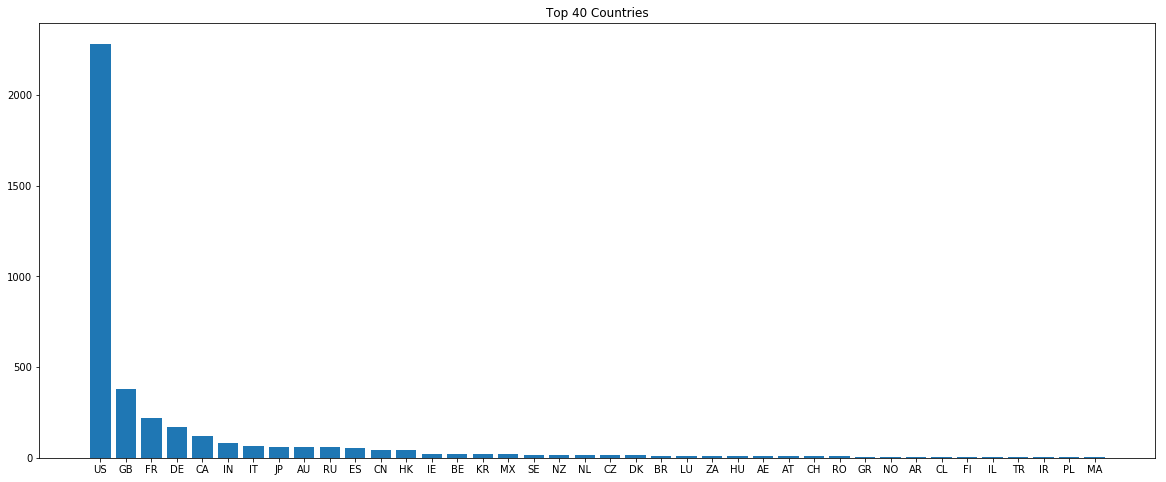

Countries that make up at least 0.05% of the data ['US', 'GB', 'FR', 'DE', 'CA', 'IN', 'IT', 'JP', 'AU', 'RU', 'ES', 'CN', 'HK', 'IE', 'BE', 'KR', 'MX', 'SE', 'NZ', 'NL', 'CZ', 'DK', 'BR', 'LU', 'ZA', 'HU', 'AE', 'AT', 'CH', 'RO', 'GR', 'NO', 'AR', 'CL', 'FI', 'IL', 'TR', 'IR', 'PL', 'MA', 'PH', 'TW', 'BG', 'BS', 'RS', 'IS', 'KH', 'MT', 'PK', 'QA', 'TN', 'UA', 'SG', 'ID']
Making one hot columns using list:
['US', 'GB', 'FR', 'DE', 'CA', 'IN', 'IT', 'JP', 'AU', 'RU', 'ES', 'CN', 'HK', 'IE', 'BE', 'KR', 'MX', 'SE', 'NZ', 'NL', 'CZ', 'DK', 'BR', 'LU', 'ZA', 'HU', 'AE', 'AT', 'CH', 'RO', 'GR', 'NO', 'AR', 'CL', 'FI', 'IL', 'TR', 'IR', 'PL', 'MA', 'PH', 'TW', 'BG', 'BS', 'RS', 'IS', 'KH', 'MT', 'PK', 'QA', 'TN', 'UA', 'SG', 'ID']


In [11]:
def transformProductionCountries(data, countries_list=None):
    country_col = get_list_of_dicts_col(data, "production_countries", "iso_3166_1")
    
    if countries_list is None:
        country_count_tuples = get_sorted_unique_value_count_in_list_of_lists(country_col)
        
        print("Number of unique countries: %d" % len(country_count_tuples))
        
        countries_list = unzip_tuples(country_count_tuples)[0]
        
        countries_counts_list = unzip_tuples(country_count_tuples)[1]
        plt.figure(figsize=(20,8))
        plt.bar(countries_list[:40], countries_counts_list[:40])
        plt.title("Top 40 Countries")
        plt.show()
        
        percentage_required = 0.0005
        
        country_count_tuples = get_items_with_minimum_percentage(percentage_required, country_count_tuples, "production_countries")
        
        countries_list = unzip_tuples(country_count_tuples)[0]
        countries_counts_list = unzip_tuples(country_count_tuples)[1]

        print("Countries that make up at least " + str(percentage_required * 100) + "% of the data " + str(countries_list))
        
    else:
        print("Making one hot columns using list:\n" + str(countries_list))

    one_hot_country = get_one_hot_df(countries_list, country_col, "country_")
    return pd.concat([data.drop(columns="production_countries"), one_hot_country], axis=1), countries_list

train_X, countries_list = transformProductionCountries(train_X)
test, _ = transformProductionCountries(test, countries_list)

#### production_companies

Number of unique companies: 3712


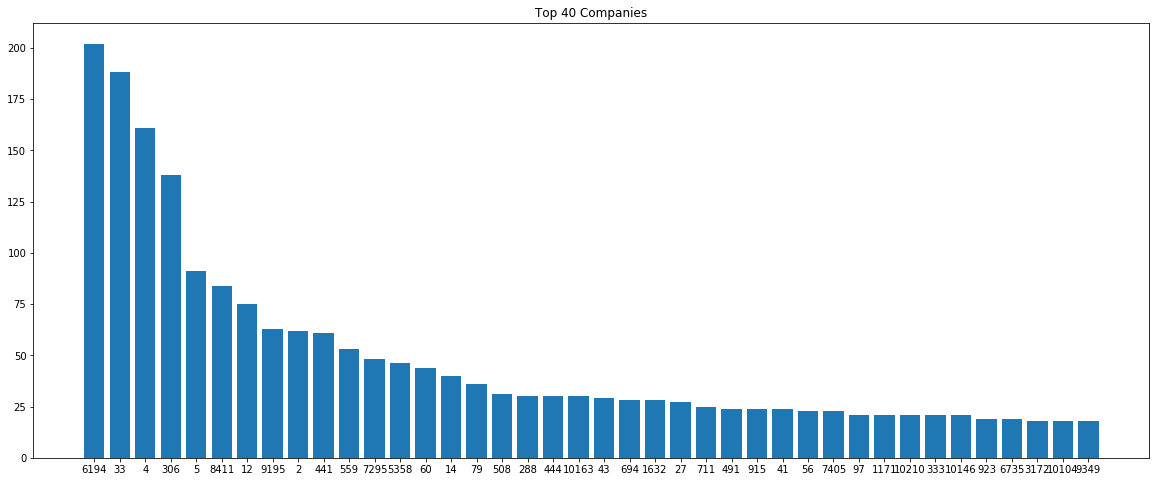

Companies that make up at least 0.05% of the data [6194, 33, 4, 306, 5, 8411, 12, 9195, 2, 441, 559, 7295, 5358, 60, 14, 79, 508, 288, 444, 10163, 43, 694, 1632, 27, 711, 491, 915, 41, 56, 7405, 97, 1171, 10210, 333, 10146, 923, 6735, 3172, 10104, 9349, 158, 23, 3287, 10254, 22213, 126, 1885, 308, 1382, 7576, 258, 6332, 2608, 264, 35, 6896, 9, 14723, 70, 2452, 3823, 83, 497, 1302, 9335, 289, 1645, 856, 316, 4564, 1422, 11317, 1444, 172, 10405, 171, 11749, 846, 10221, 11, 1088, 831, 925, 6452, 181, 562, 435, 10611, 10932, 11391, 737, 53009, 215, 6916, 9383, 431, 1403, 3, 7076, 10039, 54502, 2481, 1, 34034, 3045, 1504, 10308, 420, 76043, 13, 10201, 5870, 7025, 11345, 11509, 763, 2268, 5490, 19551, 1786, 81, 10105, 10282, 13549, 4171, 248, 2320, 13184, 41077, 2188, 9993, 6736, 932, 429, 829, 8, 10893, 130, 216, 6363, 552, 6301, 7437, 12026, 507, 7383, 2521, 104, 7281, 9168, 2683, 5755, 1755, 729, 675, 436, 9996, 826, 10339, 347, 7294, 3281, 6, 58, 1216, 521, 7493, 174, 5219, 3929, 7263, 1

In [12]:
def transformProductionCompanies(data, companies_list=None):
    company_col = get_list_of_dicts_col(data, "production_companies", "id")
    
    if companies_list is None:
        company_count_tuples = get_sorted_unique_value_count_in_list_of_lists(company_col)

        print("Number of unique companies: %d" % len(company_count_tuples))

        companies_list = unzip_tuples(company_count_tuples)[0]
        companies_counts_list = unzip_tuples(company_count_tuples)[1]

        plt.figure(figsize=(20,8))
        plt.bar([str(i) for i in companies_list[:40]], companies_counts_list[:40])
        plt.title("Top 40 Companies")
        plt.show()
        
        percentage_required = 0.0005

        company_count_tuples = get_items_with_minimum_percentage(percentage_required, company_count_tuples, "production_companies")

        companies_list = unzip_tuples(company_count_tuples)[0]
        companies_counts_list = unzip_tuples(company_count_tuples)[0]

        print("Companies that make up at least " + str(percentage_required * 100) + "% of the data " + str(companies_list))
        
    else:
        print("Making one hot columns using list:\n" + str(companies_list))

    one_hot_company = get_one_hot_df(companies_list, company_col, "company_")
    return pd.concat([data.drop(columns="production_companies"), one_hot_company], axis=1), companies_list

train_X, companies_list = transformProductionCompanies(train_X)
test, _ = transformProductionCompanies(test, companies_list)

#### Keywords

Number of unique keywords: 7400


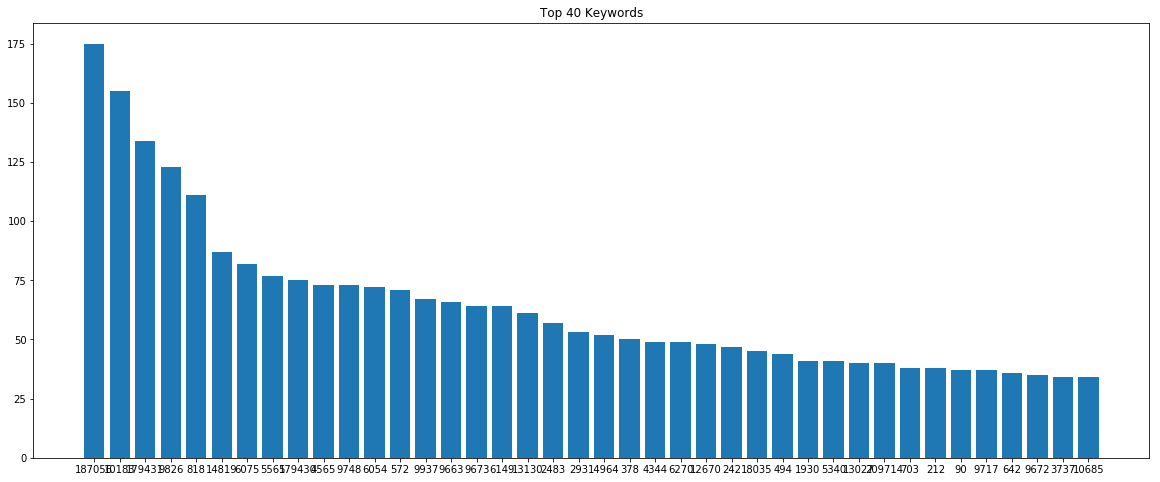

Number of keywords used for one hot encoding: 3188


In [13]:
def transformKeywords(data, keywords_list=None):
    keywords_col = get_list_of_dicts_col(data, "Keywords", "id")
    
    if keywords_list is None:
        keywords_count_tuples = get_sorted_unique_value_count_in_list_of_lists(keywords_col)

        print("Number of unique keywords: %d" % len(keywords_count_tuples))

        keywords_list = unzip_tuples(keywords_count_tuples)[0]
        keywords_counts_list = unzip_tuples(keywords_count_tuples)[1]

        plt.figure(figsize=(20,8))
        plt.bar([str(i) for i in keywords_list[:40]], keywords_counts_list[:40])
        plt.title("Top 40 Keywords")
        plt.show()
        
        percentage_required = 0.0005

        keywords_count_tuples = get_items_with_minimum_percentage(percentage_required, keywords_count_tuples, "Keywords")

        keywords_list = unzip_tuples(keywords_count_tuples)[0]
        keywords_counts_list = unzip_tuples(keywords_count_tuples)[1]

        print("Number of keywords used for one hot encoding: " + str(len(keywords_list)))

    one_hot_keywords = get_one_hot_df(keywords_list, keywords_col, "keyword_")

    return pd.concat([data.drop(columns="Keywords"), one_hot_keywords], axis=1), keywords_list

train_X, keywords_list = transformKeywords(train_X)
test, _ = transformKeywords(test, keywords_list)

#### Cast

Number of unique cast: 38760


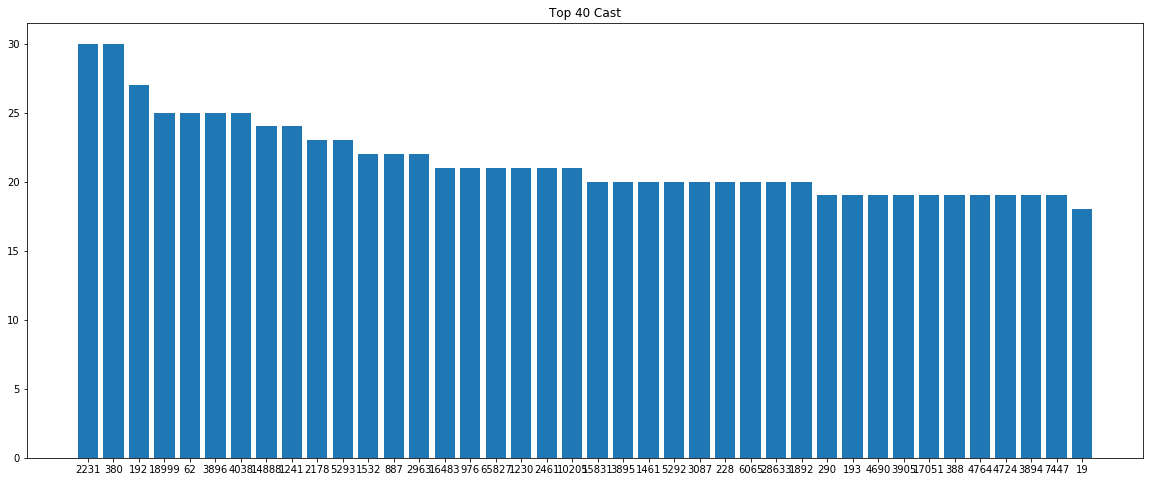

In [14]:
cast_col = get_list_of_dicts_col(train_X, "cast", "id")
cast_count_tuples = get_sorted_unique_value_count_in_list_of_lists(cast_col)
    
print("Number of unique cast: %d" % len(cast_count_tuples))

cast_list = unzip_tuples(cast_count_tuples)[0]
cast_counts_list = unzip_tuples(cast_count_tuples)[1]

plt.figure(figsize=(20,8))
plt.bar([str(i) for i in cast_list[:40]], cast_counts_list[:40])
plt.title("Top 40 Cast")
plt.show()

train_X = train_X.drop(columns="cast")
test = test.drop(columns="cast")

#### crew

Number of unique crew: 38897


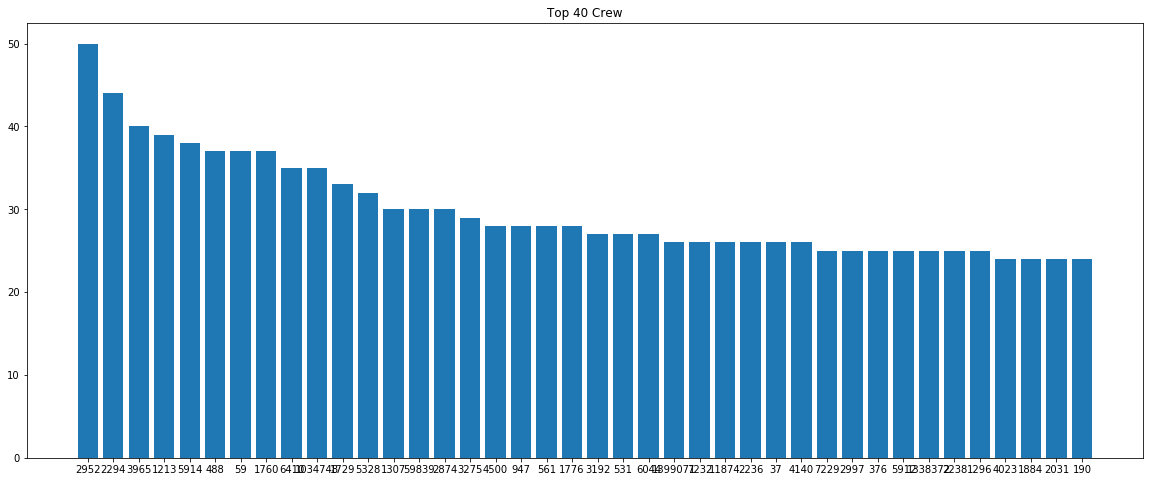

In [15]:
crew_col = get_list_of_dicts_col(train_X, "crew", "id")
crew_count_tuples = get_sorted_unique_value_count_in_list_of_lists(crew_col)
    
print("Number of unique crew: %d" % len(crew_count_tuples))

crew_list = unzip_tuples(crew_count_tuples)[0]
crew_counts_list = unzip_tuples(crew_count_tuples)[1]

plt.figure(figsize=(20,8))
plt.bar([str(i) for i in crew_list[:40]], crew_counts_list[:40])
plt.title("Top 40 Crew")
plt.show()

train_X = train_X.drop(columns="crew")
test = test.drop(columns="crew")

#### release_date

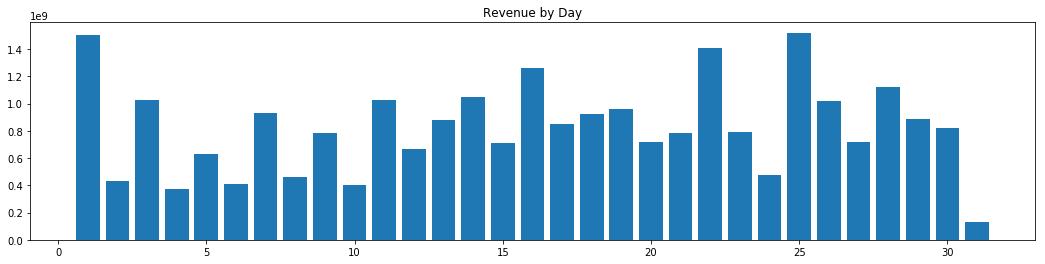

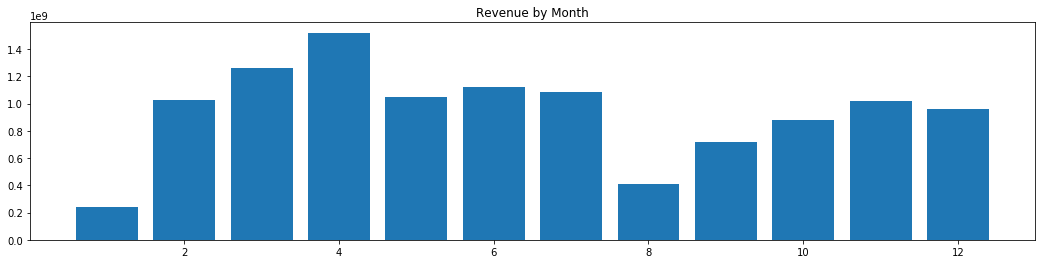

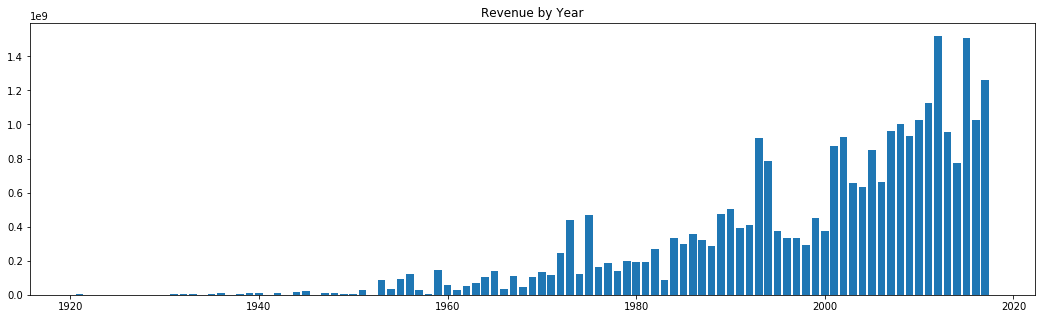

In [16]:
def find_2nd(string, substring):
    return string.find(substring, string.find(substring) + 1)

date_days = train_input["release_date"].apply(lambda x: int(x[x.find("/") + 1: find_2nd(x, "/")])).rename("release_date_day")
date_months = train_input["release_date"].apply(lambda x: int(x[0: x.find("/")])).rename("release_date_month")
date_years = train_input["release_date"].apply(lambda x: 2000 + int(x[-2:]) if int(x[-2:]) < 19 and int(x[-2:]) >= 0 else 1900 + int(x[-2:])).rename("release_date_year")

plt.figure(figsize=(18,4))
plt.bar(date_days, train_input["revenue"])
plt.title("Revenue by Day")
plt.show()

plt.figure(figsize=(18,4))
plt.bar(date_months, train_input["revenue"])
plt.title("Revenue by Month")
plt.show()

plt.figure(figsize=(18,5))
plt.bar(date_years, train_input["revenue"])
plt.title("Revenue by Year")
plt.show()

train_X = pd.concat([pd.concat([train_X.drop(columns="release_date"), date_months], axis=1), date_years], axis=1)
train_X = pd.concat([train_X, date_days], axis=1)

test["release_date"] = test["release_date"].fillna("00/00/00")

date_days = test["release_date"].apply(lambda x: int(x[x.find("/") + 1: find_2nd(x, "/")])).rename("release_date_day")
date_months = test["release_date"].apply(lambda x: int(x[0: x.find("/")])).rename("release_date_month")
date_years = test["release_date"].apply(lambda x: 2000 + int(x[-2:]) if int(x[-2:]) < 19 and int(x[-2:]) >= 0 else 1900 + int(x[-2:])).rename("release_date_year")

test = pd.concat([pd.concat([test.drop(columns="release_date"), date_months], axis=1), date_years], axis=1)
test = pd.concat([test, date_days], axis=1)

#### Normalize Data

In [17]:
from sklearn import preprocessing

bpr_scaler = preprocessing.StandardScaler().fit(train_input[["budget", "popularity", "runtime"]])

C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(array([  10.,    3.,    4.,    2.,    8.,   23.,  126.,  493., 1939.,
         392.]),
 array([ 0.        ,  1.97556818,  3.95113636,  5.92670454,  7.90227272,
         9.87784091, 11.85340909, 13.82897727, 15.80454545, 17.78011363,
        19.75568181]),
 <a list of 10 Patch objects>)

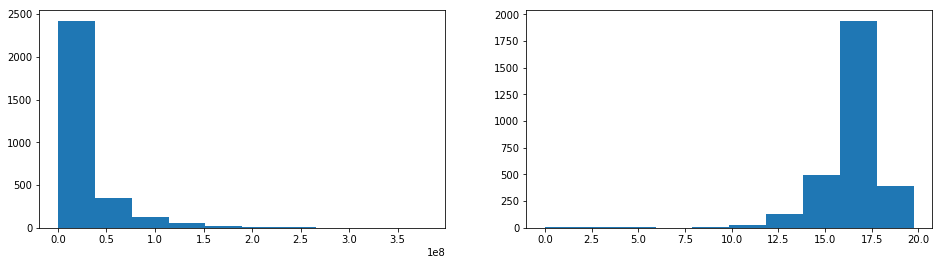

In [18]:
plt.figure(figsize=(16,4))

plt.subplot(121)
plt.hist(train_input["budget"].apply(lambda x: bpr_scaler.mean_[0] if x == 0 else x))

plt.subplot(122)
plt.hist(train_input["budget"].apply(lambda x: bpr_scaler.mean_[0] if x == 0 else x).apply(lambda x: np.log(x)))

(array([  2.,  13.,  12.,   8.,  34.,  84., 152., 193., 240.,  74.]),
 array([ 0.        ,  1.9351369 ,  3.87027381,  5.80541071,  7.74054762,
         9.67568452, 11.61082142, 13.54595833, 15.48109523, 17.41623214,
        19.35136904]),
 <a list of 10 Patch objects>)

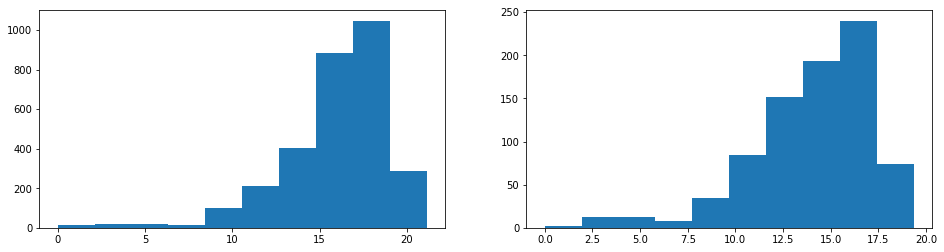

In [19]:
plt.figure(figsize=(16,4))

plt.subplot(121)
plt.hist(train_input["revenue"].apply(lambda x: np.log(x)))

plt.subplot(122)
plt.hist(train_input["revenue"][train_input["budget"] == 0].apply(lambda x: np.log(x)))

(array([1.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 5.000e+00, 2.000e+01,
        1.660e+02, 9.410e+02, 1.843e+03, 1.800e+01]),
 array([-13.81551056, -11.86548695,  -9.91546335,  -7.96543974,
         -6.01541614,  -4.06539253,  -2.11536893,  -0.16534532,
          1.78467828,   3.73470189,   5.6847255 ]),
 <a list of 10 Patch objects>)

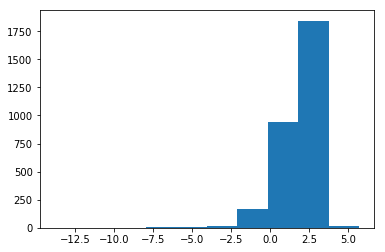

In [20]:
plt.hist(train_input["popularity"].apply(lambda x: bpr_scaler.mean_[1] if x == 0 else x).apply(lambda x: np.log(x)))

In [21]:
train_input["budget"] = train_input["budget"].apply(lambda x: bpr_scaler.mean_[0] if x == 0 else x)

print("means: " + str(bpr_scaler.mean_))
train_X[["budget", "popularity", "runtime"]] = bpr_scaler.transform(train_input[["budget", "popularity", "runtime"]])
test[["budget", "popularity", "runtime"]] = bpr_scaler.transform(test[["budget", "popularity", "runtime"]])

means: [2.25313341e+07 8.46327420e+00 1.07856571e+02]


C:\Users\shaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [22]:
train_X.head()

,belongs_to_collection,budget,homepage,popularity,runtime,language_en,language_es,language_fr,language_hi,language_ja,language_ru,genre_18,genre_35,genre_53,genre_28,genre_10749,genre_80,genre_12,genre_27,genre_878,genre_10751,genre_14,genre_9648,genre_16,genre_36,genre_10402,genre_10752,genre_99,genre_37,genre_10769,genre_10770,country_US,country_GB,country_FR,country_DE,country_CA,country_IN,country_IT,country_JP,country_AU,country_RU,country_ES,country_CN,country_HK,country_IE,country_BE,country_KR,country_MX,country_SE,country_NZ,country_NL,country_CZ,country_DK,country_BR,country_LU,country_ZA,country_HU,country_AE,country_AT,country_CH,country_RO,country_GR,country_NO,country_AR,country_CL,country_FI,country_IL,country_TR,country_IR,country_PL,country_MA,country_PH,country_TW,country_BG,country_BS,country_RS,country_IS,country_KH,country_MT,country_PK,country_QA,country_TN,country_UA,country_SG,country_ID,company_6194,company_33,company_4,company_306,company_5,company_8411,company_12,company_9195,company_2,company_441,company_559,company_7295,company_5358,company_60,company_14,company_79,company_508,company_288,company_444,company_10163,company_43,company_694,company_1632,company_27,company_711,company_491,company_915,company_41,company_56,company_7405,company_97,company_1171,company_10210,company_333,company_10146,company_923,company_6735,company_3172,company_10104,company_9349,company_158,company_23,company_3287,company_10254,company_22213,company_126,company_1885,company_308,company_1382,company_7576,company_258,company_6332,company_2608,company_264,company_35,company_6896,company_9,company_14723,company_70,company_2452,company_3823,company_83,company_497,company_1302,company_9335,company_289,company_1645,company_856,company_316,company_4564,company_1422,company_11317,company_1444,company_172,company_10405,company_171,company_11749,company_846,company_10221,company_11,company_1088,company_831,company_925,company_6452,company_181,company_562,company_435,company_10611,company_10932,company_11391,company_737,company_53009,company_215,company_6916,company_9383,company_431,company_1403,company_3,company_7076,company_10039,company_54502,company_2481,company_1,company_34034,company_3045,company_1504,company_10308,company_420,company_76043,company_13,company_10201,company_5870,company_7025,company_11345,company_11509,company_763,company_2268,company_5490,company_19551,company_1786,company_81,company_10105,company_10282,company_13549,company_4171,company_248,company_2320,company_13184,company_41077,company_2188,company_9993,company_6736,company_932,company_429,company_829,company_8,company_10893,company_130,company_216,company_6363,company_552,company_6301,company_7437,company_12026,company_507,company_7383,company_2521,company_104,company_7281,company_9168,company_2683,company_5755,company_1755,company_729,company_675,company_436,company_9996,company_826,company_10339,company_347,company_7294,company_3281,company_6,company_58,company_1216,...,keyword_5147,keyword_3760,keyword_5729,keyword_33455,keyword_15225,keyword_185927,keyword_2659,keyword_3637,keyword_163484,keyword_163674,keyword_6256,keyword_1646,keyword_162512,keyword_163481,keyword_2686,keyword_163919,keyword_190763,keyword_164148,keyword_7926,keyword_175428,keyword_1582,keyword_1720,keyword_1381,keyword_33556,keyword_162484,keyword_11634,keyword_18067,keyword_181620,keyword_234193,keyword_160588,keyword_162078,keyword_209173,keyword_4265,keyword_4522,keyword_158086,keyword_1682,keyword_15022,keyword_2029,keyword_7956,keyword_170378,keyword_1775,keyword_2113,keyword_3401,keyword_4108,keyword_44443,keyword_157775,keyword_162413,keyword_163758,keyword_194063,keyword_215191,keyword_155238,keyword_167843,keyword_166571,keyword_10303,keyword_4542,keyword_8810,keyword_18127,keyword_165100,keyword_2732,keyword_2736,keyword_4436,keyword_163242,keyword_11545,keyword_162333,keyword_1527,keyword_238241,keyword_11707,keyword_18015,keyword_3483,keyword_14647,keyword_201871,keywor

### Data Analysis

[]

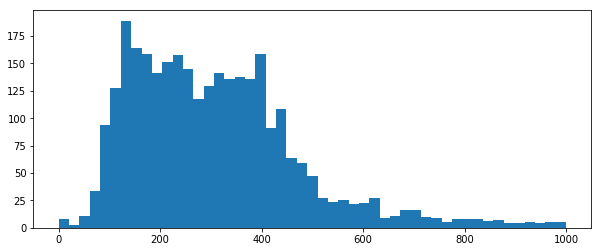

In [23]:
plt.figure(figsize=(10,4))
plt.hist(train_input["overview"].fillna("").apply(lambda x: len(x)), bins=np.linspace(0, 1000, 50))
# plt.scatter(train_input["overview"].fillna("").apply(lambda x: len(x)), train_input["revenue"])
plt.plot()

In [24]:
# import seaborn as sns

# colormap = plt.cm.RdBu
# plt.figure(figsize=(14,12))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(train_X.astype(float).corr(),linewidths=0.1,vmax=1.0, 
#             square=True, cmap=colormap, linecolor='white')

In [25]:
print("Number of NaNs in runtime: %d" % train_input["runtime"].isnull().sum())
train_X["runtime"] = train_X["runtime"].fillna(bpr_scaler.mean_[2])

Number of NaNs in runtime: 2


In [26]:
print("Number of NaNs in runtime: %d" % test_input["runtime"].isnull().sum())
test["runtime"] = test["runtime"].fillna(bpr_scaler.mean_[2])

Number of NaNs in runtime: 4


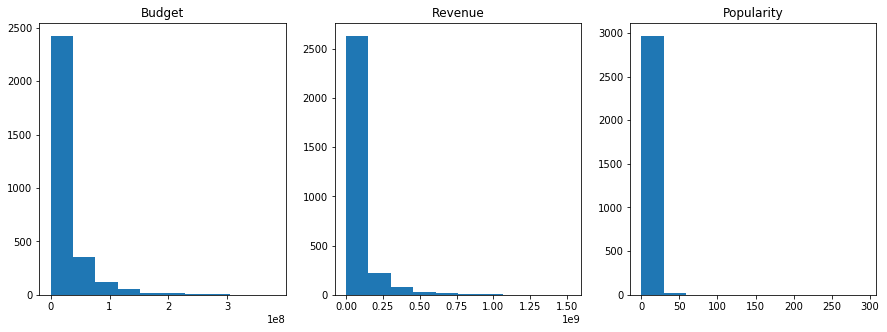

In [27]:
poster_url_head = "https://image.tmdb.org/t/p/w600_and_h900_bestv2"
from functools import reduce

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(train_input["budget"])
plt.title("Budget")

plt.subplot(132)
plt.hist(train_Y)
plt.title("Revenue")

plt.subplot(133)
plt.hist(train_input["popularity"])
plt.title("Popularity")
plt.show()

#### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
seed = 42

train_split_X, test_split_X, train_split_Y, test_split_Y = train_test_split(train_X, train_Y, test_size=0.20, random_state=seed)
validation_train_X, validation_test_X, validation_train_Y, validation_test_Y = train_test_split(train_split_X, train_split_Y, test_size=3/8, random_state=seed)

## Regression

In [29]:
import csv
import sklearn.metrics
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
            
class Regressor(object):
    def __init__(self, regressor):
        self.regressor = regressor
        self.error = sklearn.metrics.mean_squared_error
    
    def fit(self, X, Y):
        self.regressor.fit(X, Y)
    
    def predict(self, X):
        return self.regressor.predict(X)
    
    def error(self, actual, predicted):
        return self.error(actual, predicted)
    
    def set_error(self, error):
        self.error = error
    
    def prediction_metrics(self, actual, predicted):
        return pd.DataFrame([[np.sqrt(self.error(actual, predicted)), sklearn.metrics.r2_score(actual, predicted)]], columns=["error", "r2"])
    
    def write_to_csv(self, input):
        predicted = self.regressor.predict(input)
        with open("submission.csv", "w", newline='') as outfile:
            writer = csv.writer(outfile)
            writer.writerow(["id", "revenue"])
            arr = [[i[1], i[0]] for i in zip(predicted, range(3001, len(predicted) + 3001))]
            for a in arr:
                writer.writerow(a)
    
    def plot_error_histogram(self, actual, predicted, title=None):
        pred_test_tuples = zip(predicted, actual)
        squared_errors = [(i[0] - i[1])**2 for i in pred_test_tuples]
        plt.hist(squared_errors,  label="Squared Error")
        plt.title(title)
        plt.legend(loc='best')
    
    def show_tree(self):
        dot_data = StringIO()
        export_graphviz(self.regressor, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
        (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
        return Image(graph.create_png())
    
    def get_regressor(self):
        return self.regressor

In [30]:
from sklearn.linear_model import LinearRegression

linear_regressor = Regressor(LinearRegression(fit_intercept=True))
linear_regressor.fit(train_split_X, train_split_Y)
linear_regressor.prediction_metrics(test_split_Y, linear_regressor.predict(test_split_X))

,error,r2
0,7.213823e+16,-3.093910e+17


In [31]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = Regressor(DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_leaf=20))
dt_regressor.fit(train_split_X, train_split_Y)
dt_regressor.prediction_metrics(test_split_Y, dt_regressor.predict(test_split_X))

,error,r2
0,7.477563e+07,0.667573


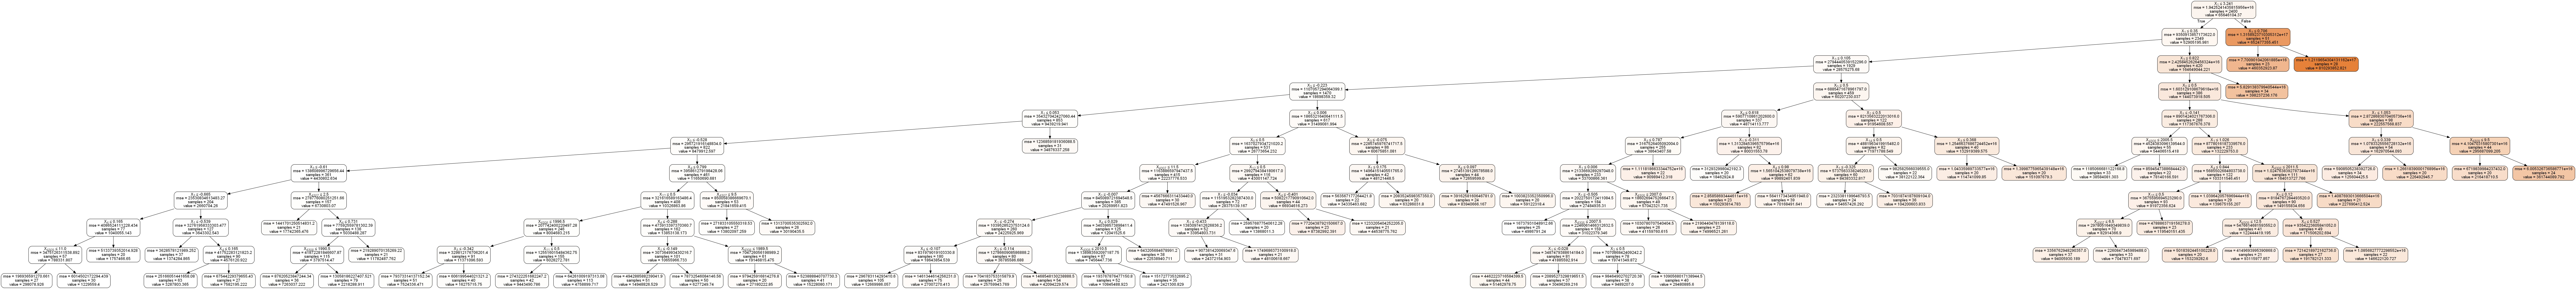

In [32]:
dt_regressor.show_tree()

In [182]:
from skopt import BayesSearchCV
from sklearn.metrics import make_scorer

dt_search_space = {
    'max_depth': (1, 50),
    'min_samples_leaf': (1e-8, 0.5, 'log-uniform'),
    'min_samples_split': (2, 200)
}

dt_opt = BayesSearchCV(DecisionTreeRegressor(random_state=42),
                       dt_search_space,
                       n_iter=100,
                       n_points=8,
                       n_jobs=8,
                       cv=3, 
                       random_state=42, 
                       scoring=make_scorer(sklearn.metrics.r2_score))
dt_opt.fit(validation_train_X, validation_train_Y)

print("val. score: %s" % dt_opt.best_score_)
print("test score: %s" % dt_opt.score(validation_test_X, validation_test_Y))
dt_opt.best_params_

val. score: 0.5658468793009461
test score: 0.5052124114948353


{'max_depth': 13,
 'min_samples_leaf': 0.0037747789241804426,
 'min_samples_split': 23}

In [183]:
dt_regressor = Regressor(DecisionTreeRegressor(random_state=42,
                                               max_depth=dt_opt.best_params_["max_depth"], 
                                               min_samples_leaf=dt_opt.best_params_["min_samples_leaf"],
                                               min_samples_split=dt_opt.best_params_["min_samples_split"]))
dt_regressor.fit(train_split_X, train_split_Y)
dt_regressor.prediction_metrics(test_split_Y, dt_regressor.predict(test_split_X))

,error,r2
0,7.899119e+07,0.629034


In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = Regressor(RandomForestRegressor(n_estimators=10, random_state=42, max_depth=10, min_samples_leaf=20))
rf_regressor.set_error(sklearn.metrics.mean_squared_log_error)
rf_regressor.fit(train_split_X, train_split_Y)
rf_regressor.prediction_metrics(test_split_Y, rf_regressor.predict(test_split_X))

,error,r2
0,2.560177,0.664167


In [184]:
rf_search_space = {
    'n_estimators':(1, 50),
    'max_depth': (1, 50),
    'min_samples_leaf': (1, 200),
}

rf_opt = BayesSearchCV(RandomForestRegressor(random_state=42),
                       rf_search_space,
                       n_iter=40,
                       n_points=8,
                       n_jobs=8,
                       cv=3, 
                       random_state=42, 
                       scoring=make_scorer(sklearn.metrics.r2_score))
rf_opt.fit(validation_train_X, validation_train_Y)

print("val. score: %s" % rf_opt.best_score_)
print("test score: %s" % rf_opt.score(validation_test_X, validation_test_Y))
rf_opt.best_params_

val. score: 0.6687877550143031
test score: 0.6367210737442359


{'max_depth': 33, 'min_samples_leaf': 1, 'n_estimators': 50}

In [185]:
rf_regressor = Regressor(RandomForestRegressor(random_state=42, 
                                               n_estimators=rf_opt.best_params_["n_estimators"], 
                                               max_depth=rf_opt.best_params_["max_depth"], 
                                               min_samples_leaf=rf_opt.best_params_["min_samples_leaf"]))
rf_regressor.fit(train_split_X, train_split_Y)
rf_regressor.prediction_metrics(test_split_Y, rf_regressor.predict(test_split_X))

,error,r2
0,7.109953e+07,0.699455


In [186]:
rf_regressor.write_to_csv(test)

In [31]:
import xgboost as xgb

xgb_regressor = Regressor(xgb.XGBRegressor(n_estimators=31, random_state=42, max_depth=10, min_child_weight=10))
xgb_regressor.fit(train_split_X, train_split_Y)
xgb_regressor.prediction_metrics(test_split_Y, xgb_regressor.predict(test_split_X))

,error,r2
0,6.852373e+07,0.720836


In [188]:
xgb_search_space = {
    'n_estimators':(5, 40),
    'max_depth': (1, 50),
    'min_child_weight': (1, 200),
}

# xgb.XGBRegressor().get_params()
xgb_opt = BayesSearchCV(xgb.XGBRegressor(random_state=42), 
                        xgb_search_space, 
                        n_iter=50,
                        n_points=8,
                        n_jobs=8,
                        cv=3, 
                        random_state=42, 
                        scoring=make_scorer(sklearn.metrics.r2_score))
xgb_opt.fit(validation_train_X, validation_train_Y)

print("val. score: %s" % xgb_opt.best_score_)
print("test score: %s" % xgb_opt.score(validation_test_X, validation_test_Y))
xgb_opt.best_params_

val. score: 0.6443104912037166
test score: 0.6317909219442228


{'max_depth': 39, 'min_child_weight': 21, 'n_estimators': 40}

In [32]:
xgb_regressor = Regressor(xgb.XGBRegressor(random_state=42, 
                                           n_estimators=xgb_opt.best_params_["n_estimators"],
                                           max_depth=xgb_opt.best_params_["max_depth"],
                                           min_child_weight=xgb_opt.best_params_["min_child_weight"]))
xgb_regressor.fit(train_split_X, train_split_Y)
xgb_regressor.prediction_metrics(test_split_Y, xgb_regressor.predict(test_split_X))

NameError: name 'xgb_opt' is not defined

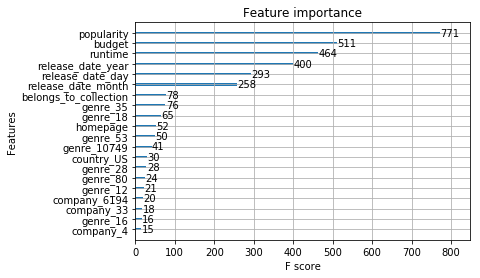

In [198]:
xgb.plot_importance(xgb_regressor.get_regressor(), max_num_features=20)

In [35]:
from catboost import CatBoostRegressor

cat_regressor = Regressor(CatBoostRegressor(iterations=100, random_state=42))
cat_regressor.get_regressor().fit(train_split_X, train_split_Y, verbose=False)
cat_regressor.prediction_metrics(test_split_Y, cat_regressor.predict(test_split_X))

,error,r2
0,6.992476e+07,0.709304


In [201]:
cat_regressor.write_to_csv(test)

In [191]:
xgb_regressor.write_to_csv(test)

In [36]:
from sklearn.neural_network import MLPRegressor

# mlp_regressor = Regressor(MLPRegressor(random_state=42, hidden_layer_sizes=(11, 10), activation='relu', solver='lbfgs'))
mlp_regressor = Regressor(MLPRegressor(random_state=42, hidden_layer_sizes=(50, 25), activation='relu', solver='lbfgs', learning_rate='adaptive'))
# mlp_regressor.set_error(sklearn.metrics.mean_squared_log_error)
mlp_regressor.fit(train_split_X, train_split_Y)
mlp_regressor.prediction_metrics(test_split_Y, mlp_regressor.predict(test_split_X))

,error,r2
0,7.870895e+07,0.63168


In [54]:
mlp_regressor.write_to_csv(test)

In [37]:
from sklearn.linear_model import Ridge

ridge_regressor = Regressor(Ridge(random_state=42, fit_intercept=True, alpha=26))
ridge_regressor.fit(train_split_X, train_split_Y)
ridge_regressor.prediction_metrics(test_split_Y, ridge_regressor.predict(test_split_X))

,error,r2
0,7.444942e+07,0.670467


In [157]:
ridge_regressor.write_to_csv(test)

In [38]:
from sklearn.linear_model import Lasso

lasso_regressor = Regressor(Lasso(random_state=42, fit_intercept=True, alpha=50, max_iter=5000, tol=1e-4))
# lasso_regressor.set_error(sklearn.metrics.mean_squared_log_error)
lasso_regressor.fit(train_split_X, train_split_Y)
lasso_regressor.prediction_metrics(test_split_Y, lasso_regressor.predict(test_split_X))

C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,error,r2
0,1.737062e+08,-0.793937


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

sgb_regressor = Regressor(GradientBoostingRegressor(random_state=42, loss='ls', criterion="mae"))
sgb_regressor.fit(train_split_X, train_split_Y)
sgb_regressor.prediction_metrics(test_split_Y, sgb_regressor.predict(test_split_X))

In [203]:
sgb_regressor.write_to_csv(test)

In [33]:
xgb_regressor = Regressor(xgb.XGBRegressor(objective = 'reg:linear',
                                  eta = 0.01,
                                  max_depth = 6,
                                  min_child_weight = 3,
                                  subsample = 0.8,
                                  colsample_bytree = 0.7,
                                  eval_metric = 'rmse',
                                  seed = 1,
                                  n_estimators = 2800))

xgb_regressor.fit(train_split_X, train_split_Y)
xgb_regressor.prediction_metrics(test_split_Y, xgb_regressor.predict(test_split_X))

,error,r2
0,7.115352e+07,0.698998
